# SI 618 Day 9: Dimension Reduction: In-class Exercises

### Dr. Chris Teplovs, School of Information, University of Michigan
Copyright &copy; 2024.  This notebook may not be shared outside of the course without permission.

### Please ensure you have this version:
Version 2024.03.13.3.CT

### Task (to generate data for use later in today's class):

#### If you haven't already done so:

Fill in the [spreadsheet](https://docs.google.com/spreadsheets/d/1p5qj-qGPif7jXjAOBjNyMsghAaPxORlmqHV-OFlM-ww/edit?usp=sharing) with your music preferences.  Rate each genre on a scale of 1 to 10, with 1 being "no way" and 10 being "the best".  Note that you are indicating your preference for each genre on a scale of 1-10; 
you are not ranking the genres from 1-10.  Thus, you can have all 10s if you love all genres of music, or all 1s if you hate music in general.

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import manifold

## Demo

Let's set up a really simple dataframe to play with:

In [98]:
demo = pd.DataFrame({'a': [1, 2, 3, 1], 'b': [1, 4, 6, 1], 'c': [2, 4, 6, 3]},
                    index=['Chris', 'Xin', 'Arjun', 'Buko'])

In [99]:
demo

,a,b,c
Chris,1,1,2
Xin,2,4,4
Arjun,3,6,6
Buko,1,1,3


And then let's split the dataframe into X and y matrices:

In [100]:
demo_X = demo.values

In [101]:
demo_X

array([[1, 1, 2],
       [2, 4, 4],
       [3, 6, 6],
       [1, 1, 3]])

In [102]:
demo_y = demo.index

In [103]:
demo_y

Index(['Chris', 'Xin', 'Arjun', 'Buko'], dtype='object')

## Multi-dimensional scaling (MDS)

In [104]:
nmds = manifold.MDS(n_components=2,
                    metric=False,
                    max_iter=3000,
                    eps=1e-9,
                    random_state=42,
                    dissimilarity='euclidean',
                    normalized_stress='auto',
                    n_jobs=1)

In [105]:
npos = nmds.fit_transform(demo_X)

In [106]:
npos

array([[-0.25640198,  0.45035412],
       [ 0.10299116, -0.125423  ],
       [ 0.43708603, -0.41819504],
       [-0.28367521,  0.09326392]])

In [107]:
npos_labelled = pd.concat([pd.DataFrame({'who': demo_y}), pd.DataFrame(npos)], axis=1)

In [108]:
npos_labelled.columns = ['who', 'mds1', 'mds2']

In [109]:
npos_labelled

,who,mds1,mds2
0,Chris,-0.256402,0.450354
1,Xin,0.102991,-0.125423
2,Arjun,0.437086,-0.418195
3,Buko,-0.283675,0.093264


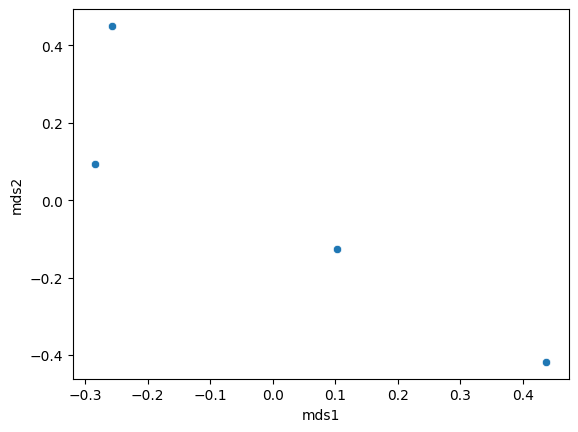

In [110]:
p1 = sns.scatterplot(data=npos_labelled, x='mds1', y='mds2')

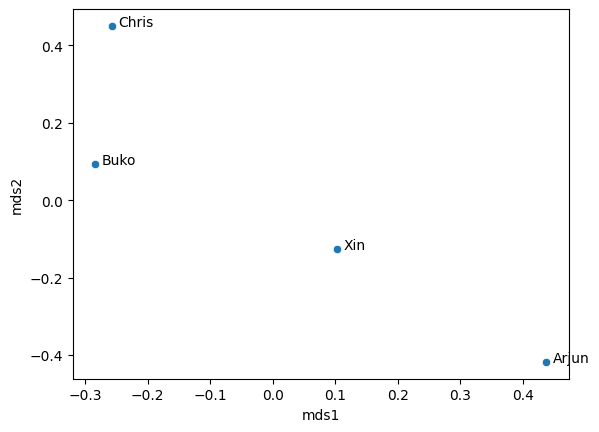

In [111]:
# Based on https://stackoverflow.com/questions/46027653/adding-labels-in-x-y-scatter-plot-with-seaborn
p1 = sns.scatterplot(data=npos_labelled, x='mds1', y='mds2')
for line in range(0, npos_labelled.shape[0]):
     p1.text(npos_labelled['mds1'][line]+0.01, npos_labelled['mds2'][line], 
     npos_labelled['who'][line], horizontalalignment='left', 
     size='medium', color='black')

In [112]:
def labelled_scatterplot(data=None,x=None,y=None,labs=None):
    p1 = sns.scatterplot(data=data,x=x,y=y)
    for line in range(0,data.shape[0]):
        if data[labs][line] == 'Chris T':
            c = 'red'
        else:
            c = 'black'
        p1.text(data[x][line]+0.01, data[y][line], 
                data[labs][line], horizontalalignment='left', 
                size='medium', color=c)

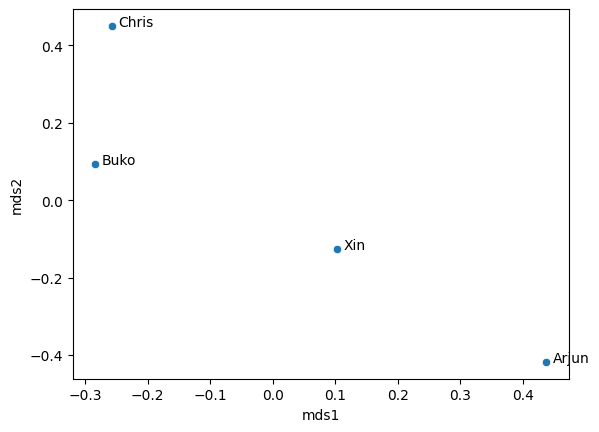

In [113]:
labelled_scatterplot(npos_labelled,'mds1','mds2','who')

## Principal Components Analysis (PCA)

In [114]:
demo

,a,b,c
Chris,1,1,2
Xin,2,4,4
Arjun,3,6,6
Buko,1,1,3


In [115]:
from sklearn.preprocessing import scale
scale(demo_X)

array([[-0.90453403, -0.94280904, -1.18321596],
       [ 0.30151134,  0.47140452,  0.16903085],
       [ 1.50755672,  1.41421356,  1.52127766],
       [-0.90453403, -0.94280904, -0.50709255]])

In [116]:
np.var([-1.29777, .016222, 1.135549])

np.float64(0.9889454738615555)

In [117]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scale(demo_X))

In [118]:
X_pca

array([[-1.74849588, -0.21383124],
       [ 0.54456683, -0.1913689 ],
       [ 2.56500363,  0.07178607],
       [-1.36107457,  0.33341407]])

In [119]:
X_pca_labelled = pd.concat([pd.DataFrame({'who':demo_y}),pd.DataFrame(X_pca,columns=['pca1','pca2'])],axis=1)

In [120]:
X_pca_labelled

,who,pca1,pca2
0,Chris,-1.748496,-0.213831
1,Xin,0.544567,-0.191369
2,Arjun,2.565004,0.071786
3,Buko,-1.361075,0.333414


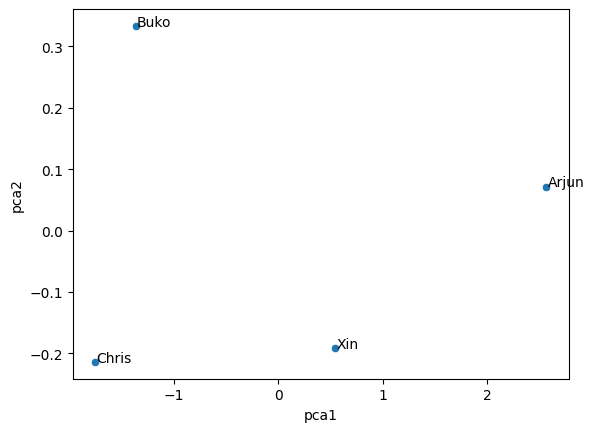

In [121]:
labelled_scatterplot(data=X_pca_labelled,x='pca1',y='pca2',labs='who')

In [122]:
pca.explained_variance_

array([3.9285195 , 0.06622135])

In [123]:
np.cov(X_pca)

array([[ 1.17759778, -0.56470727, -1.91312642,  1.3002359 ],
       [-0.56470727,  0.2708007 ,  0.91742394, -0.62351737],
       [-1.91312642,  0.91742394,  3.10806691, -2.11236443],
       [ 1.3002359 , -0.62351737, -2.11236443,  1.43564589]])

In [124]:
pca.explained_variance_ratio_

array([0.98212987, 0.01655534])

### Question: 
What's the expected explained variance ratio for each variable?

**Answer:** for n variables, the expected explained variance for each variable is 1/n.

## t-SNE

In [125]:
# import t-SNE package from sklearn
from sklearn.manifold import TSNE

In [126]:
demo_X

array([[1, 1, 2],
       [2, 4, 4],
       [3, 6, 6],
       [1, 1, 3]])

In [127]:
tsne = TSNE(n_components=2, perplexity=2, random_state=0)
X = demo_X.copy()
X_2d = tsne.fit_transform(X)

In [128]:
X_2d

array([[-45.002987 , -53.931202 ],
       [-20.896908 ,  45.030678 ],
       [-22.708523 ,  89.93357  ],
       [ -4.4509025, -31.932175 ]], dtype=float32)

In [129]:
tsne_labelled = pd.concat([pd.DataFrame({'who':demo_y}),pd.DataFrame(X_2d,columns=['d1','d2'])],axis=1)

In [130]:
tsne_labelled

,who,d1,d2
0,Chris,-45.002987,-53.931202
1,Xin,-20.896908,45.030678
2,Arjun,-22.708523,89.933571
3,Buko,-4.450902,-31.932175


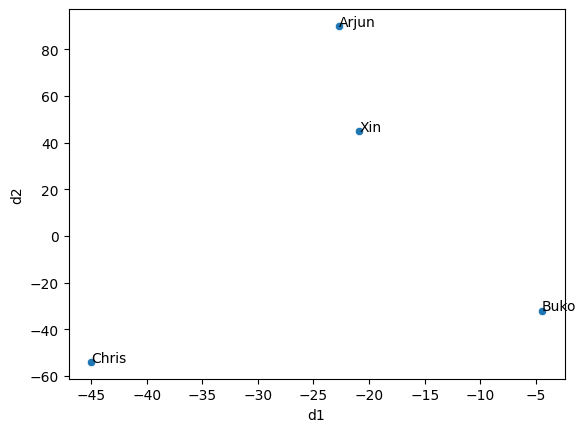

In [131]:
labelled_scatterplot(data=tsne_labelled, x='d1', y='d2', labs='who')

### t-SNE demo
https://cs.stanford.edu/people/karpathy/tsnejs/csvdemo.html

# On your own, in pairs, or in small groups:

Let's read the CSV file of the music data we generated at the start of today's class:

In [132]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTnvfFzQRzibiGd92rL2UvolprozD3BtqlhzYb8EhA3gdoYEKYrDfoNa1p7sdQZTg4fYJ6VOrZnD4mU/pub?gid=0&single=true&output=csv"
music = pd.read_csv(url)

In [133]:
music

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
0,Chris T.,5,10,6,4,7,4,10,6,5,8
1,Mads F.,2,1,5,6,6,6,2,4,9,7
2,Sualeha F.,9,9,7,8,4,6,8,7,9,9
3,Louhith U.,4,3,7,1,2,7,3,1,5,10
4,Ruoyi G.,2,4,2,7,2,1,8,1,7,5
5,Rachel T.,4,3,1,3,8,2,6,3,6,6
6,Z,5,8,2,6,4,5,7,5,8,5
7,Shangqing W.,8,7,6,2,2,1,9,3,9,10
8,Jiatai Y.,5,5,8,7,6,3,3,2,8,9
9,Anusha P.,5,7,4,6,3,5,5,6,9,9


In [134]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        46 non-null     object
 1   Blues       46 non-null     int64 
 2   Classical   46 non-null     int64 
 3   Country     46 non-null     int64 
 4   Electronic  46 non-null     int64 
 5   Folk        46 non-null     int64 
 6   Hip Hop     46 non-null     int64 
 7   Jazz        46 non-null     int64 
 8   Latin       46 non-null     int64 
 9   Pop         46 non-null     int64 
 10  Rock        46 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 4.1+ KB


In [135]:
music.describe()

,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,4.369565,5.369565,4.891304,5.173913,4.869565,5.152174,5.695652,3.847826,7.065217,7.173913
std,2.163934,2.090813,2.292289,2.321918,2.587222,2.230769,2.365207,2.149598,2.322854,2.263766
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.250000,2.000000,6.000000,5.250000
50%,4.000000,5.000000,5.000000,6.000000,5.000000,6.000000,6.000000,3.500000,7.000000,8.000000
75%,5.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,5.000000,9.000000,9.000000
max,9.000000,10.000000,9.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,10.000000


<Axes: >

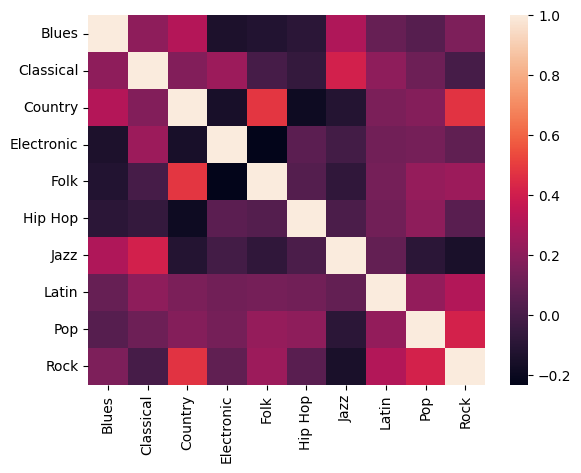

In [136]:
sns.heatmap(music.corr(numeric_only=True))

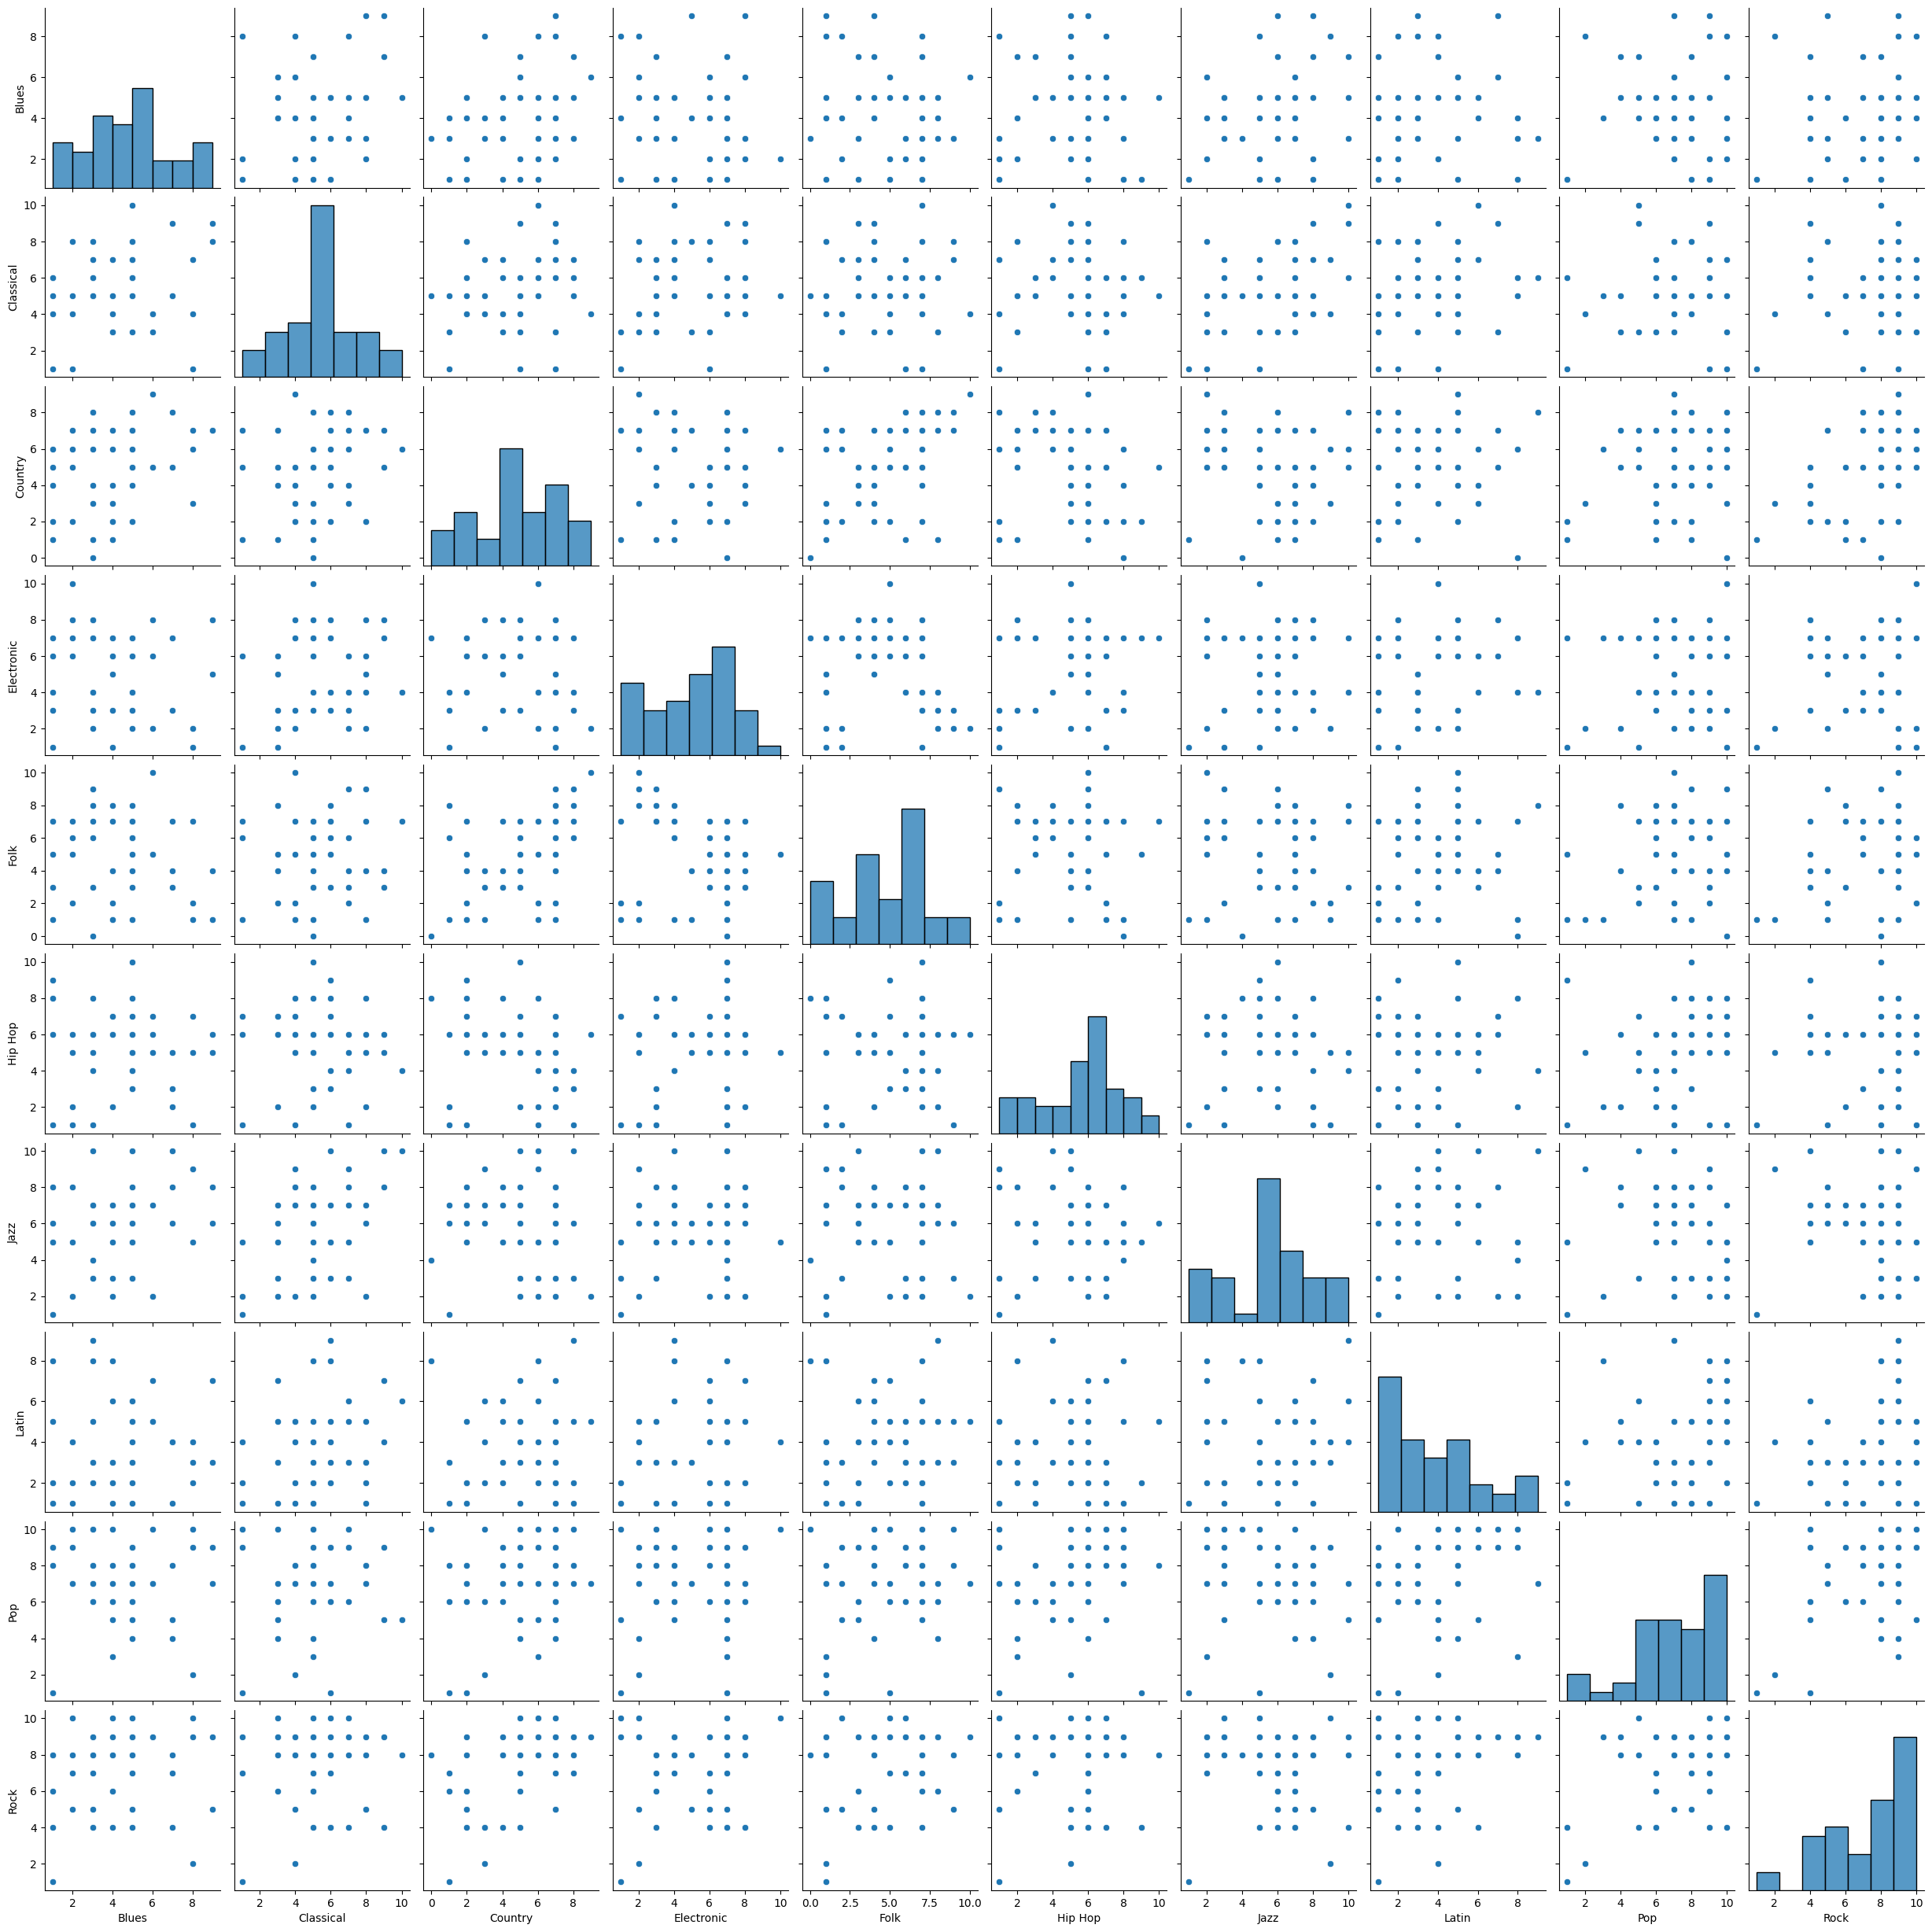

In [137]:
sns.pairplot(music)

## Challenge
Create X (features matrix) and y (labels matrix) from the `music` dataframe:

In [138]:
# Create X and y from the music df
X = music.drop(columns=['Name']).values
y = music['Name']

## Challenge
Perform a multi-dimensional scaling on the music data.  Should you use metric or non-metric MDS?  Do the 
results differ between metric and non-metric?  Visualize your results.

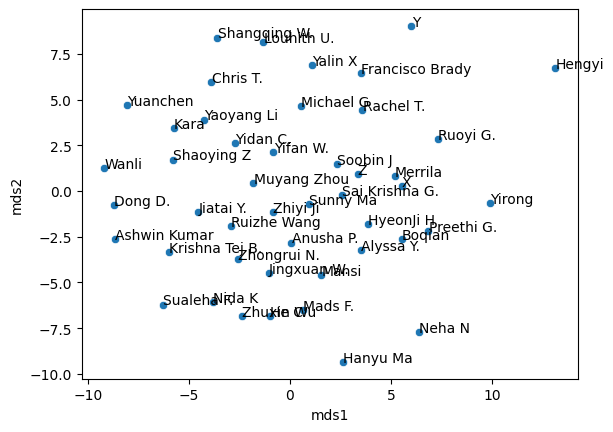

In [139]:
# Metric MDS
mds_metric = manifold.MDS(n_components=2,
                    metric=True,
                    max_iter=3000,
                    eps=1e-9,
                    random_state=42,
                    dissimilarity='euclidean',
                    n_jobs=1)

npos_metric = mds_metric.fit_transform(X)
npos_labelled_metric = pd.concat([pd.DataFrame({'who': y}), pd.DataFrame(npos_metric)], axis=1)
npos_labelled_metric.columns = ['who', 'mds1', 'mds2']

labelled_scatterplot(data=npos_labelled_metric, x='mds1', y='mds2', labs='who')

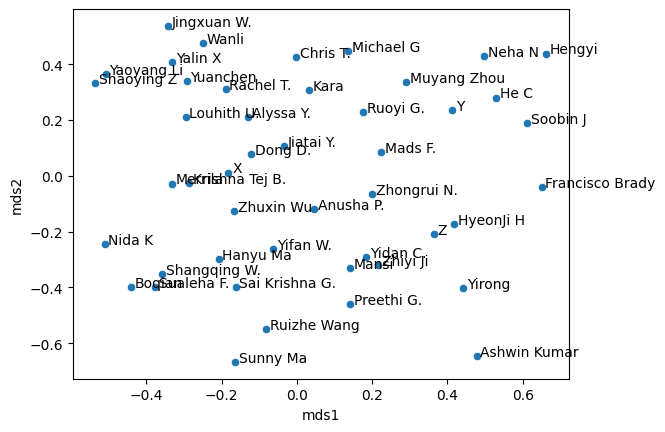

In [140]:
# non-metric MDS
mds_nonmetric = manifold.MDS(n_components=2,
                    metric=False,
                    max_iter=3000,
                    eps=1e-9,
                    random_state=42,
                    dissimilarity='euclidean',
                    normalized_stress='auto',
                    n_jobs=1)
fpos_nonmetric = mds_nonmetric.fit_transform(X)

# Visualization
fpos_labelled_nonmetric = pd.concat([pd.DataFrame({'who': y}), pd.DataFrame(fpos_nonmetric)], axis=1)
fpos_labelled_nonmetric.columns = ['who', 'mds1', 'mds2']
labelled_scatterplot(data=fpos_labelled_nonmetric, x='mds1', y='mds2', labs='who')


The graph for non-metric MDS is more spread out

## Challenge
Perform a principal components analysis (PCA) on the music data.  Do you think you should scale the data before you
do the PCA?  How many principal components should you retain (hint: look at a scree plot and/or eigenvalues, a.k.a. the explained_variance_ attribute of the PCA model).  Visualize your results.

We probably don't need to scale the data before doing PCA transformation. Because all the features are on the same scale ranging from 1 to 10.

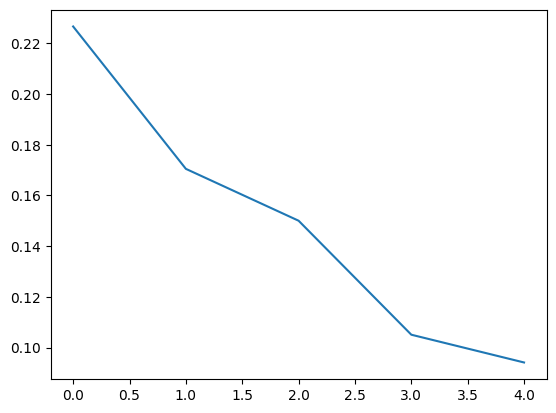

In [141]:
# Perform PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(scale(X))

# Draw the scree plot
plt.plot(pca.explained_variance_ratio_)


In [142]:
# Show the explained variance
pca.explained_variance_ratio_

array([0.22670131, 0.17051591, 0.15004657, 0.10505937, 0.09410194])

### Visualizing principal components

In [143]:
def pca_results(data, columns, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1, len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns=columns)
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize=(14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax=ax, kind='bar')
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis=1)



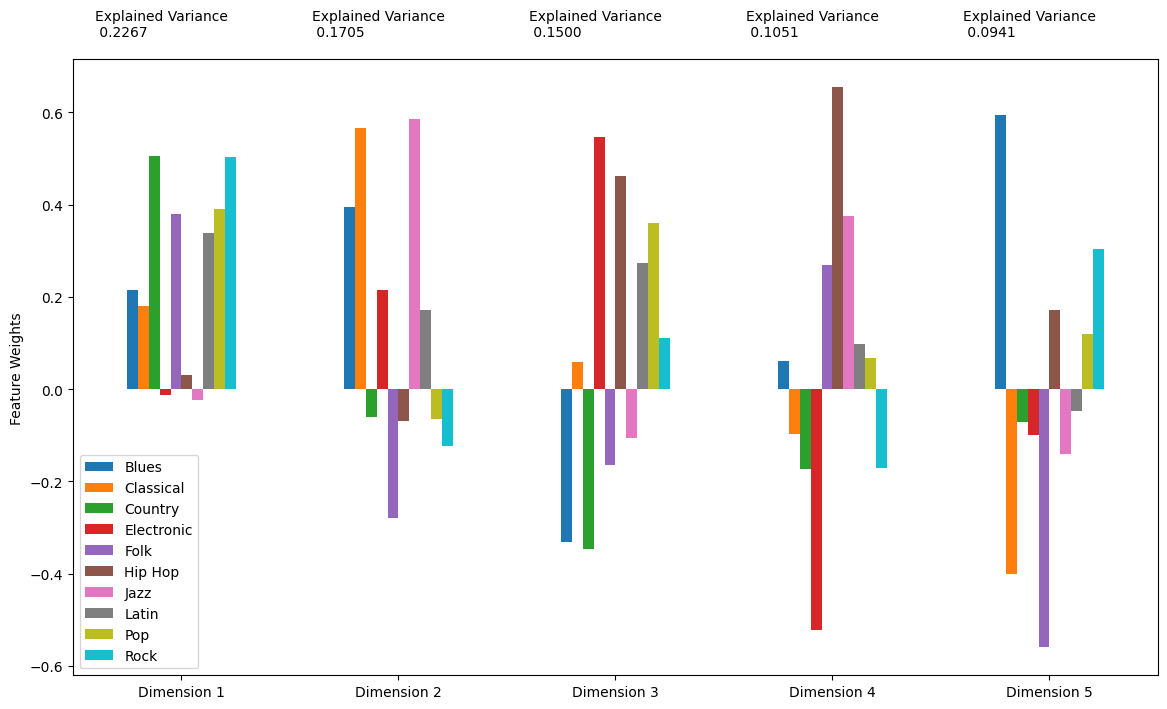

In [144]:
pcax = pca_results(X_pca, music.columns[1:], pca)

## Challenge
Perform a t-SNE analysis of the music data.  Experiment with different hyperparameters (i.e. perplexity and n_iter) to see how your solution changes.  Visualize your results.

/Users/jonasxie/Documents/umich/courses/SI618/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


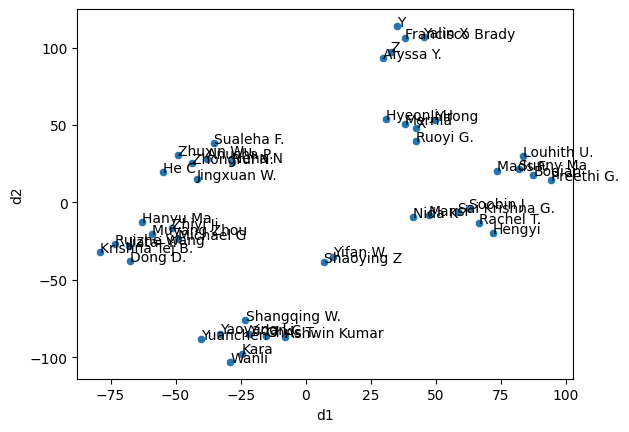

In [145]:
# perform tSNE
tsne = TSNE(n_components=2, perplexity=2, random_state=0, n_iter=1000)
X_tsne = tsne.fit_transform(X)

# Visualize the results
data_tsne = pd.concat([pd.DataFrame({'who': y}),
                        pd.DataFrame(data = X_tsne, columns=['d1','d2'])], axis=1)
labelled_scatterplot(data=data_tsne, x='d1', y='d2', labs='who')


/Users/jonasxie/Documents/umich/courses/SI618/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


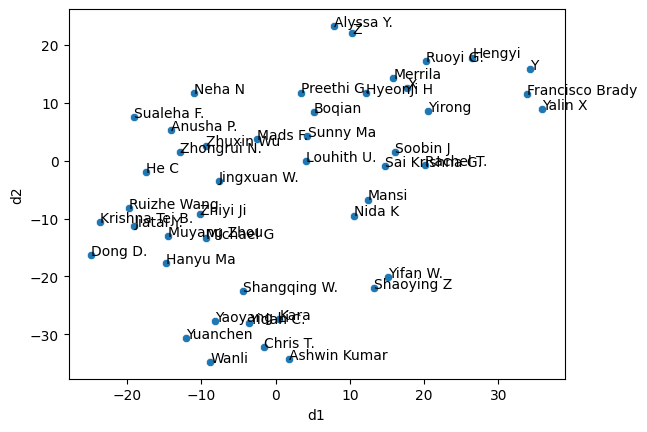

In [146]:
# perform tSNE with n_iter=2000, perplexity=5
tsne_updated = TSNE(n_components=2, perplexity=5, random_state=0, n_iter=2000)
X_tsne_updated = tsne_updated.fit_transform(X)

# Visualize the results
data_tsne_updated = pd.concat([pd.DataFrame({'who': y}),
                                pd.DataFrame(data = X_tsne_updated, 
                                             columns=['d1','d2'])], axis=1)
labelled_scatterplot(data=data_tsne_updated, x='d1', y='d2', labs='who')



## Challenge
Compare the three analyses (MDS, PCA, and t-SNE).  Comment on similarities and differences.  What do you think the best technique is to use with the music data?

I think PCA method help us better understand the correlation between favor of different genres of music. t-SNE helps up better group the people with similar favor of music.

## Challenge

Use a Pipeline to perform a PCA on the music data.

## A few words about pipelines

Consider the following pipeline:

In [147]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = Pipeline([
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=5,random_state=42)),
])

In [148]:
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('pca', PCA(n_components=5, random_state=42))])

The pipeline can be queried by using `get_params()`:

In [149]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('pca', PCA(n_components=5, random_state=42))],
 'verbose': False,
 'scale': StandardScaler(),
 'pca': PCA(n_components=5, random_state=42),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 5,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': 42,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False}

The `named_steps` attribute holds (unsurprisingly) the named steps of the pipeline:

In [150]:
pipe.named_steps

{'scale': StandardScaler(), 'pca': PCA(n_components=5, random_state=42)}

The steps themselves can be accessed as attributes of the `named_steps` property:

In [151]:
pipe.named_steps.pca

PCA(n_components=5, random_state=42)

And specifics about the step can be modified by assigning new values to them:

In [152]:
pipe.named_steps.pca.n_components=3

In [153]:
pipe.named_steps.pca

PCA(n_components=3, random_state=42)

In [154]:
# Fit the pipeline to our data
pipe.fit(X)

Pipeline(steps=[('scale', StandardScaler()),
                ('pca', PCA(n_components=3, random_state=42))])

In [156]:
pipe.named_steps.pca.explained_variance_ratio_ # Get the ratio of explained variance of PCA

array([0.22670131, 0.17051591, 0.15004657])